In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Download Historical adjusted prices from Yahoo

In [ ]:
### Set time from to a certain number of years
years = 15

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [ ]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

In [ ]:
adj_close_df.to_csv('data/stocks.csv')

In [6]:
analysis_years = 1

start_date = dt.datetime.now() - dt.timedelta(days=analysis_years * 365)


In [7]:
adj_close_df = pd.read_csv('data/stocks.csv', parse_dates=['Date'], index_col='Date')

In [8]:
adj_close_df = adj_close_df[adj_close_df.index > start_date]

In [9]:
adj_close_df.head()

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2023-08-28,436.652405,68.768097,178.130005,364.246307,216.717270
2023-08-29,442.964081,69.192940,179.869995,372.201416,219.869659
2023-08-30,444.788544,69.163971,180.320007,374.277100,220.844940
2023-08-31,444.137665,69.279846,180.020004,375.399323,220.608521
2023-09-01,444.966064,68.946762,180.110001,375.002075,221.337494


In [10]:
print(adj_close_df.pct_change())

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-28       NaN       NaN       NaN       NaN       NaN
2023-08-29  0.014455  0.006178  0.009768  0.021840  0.014546
2023-08-30  0.004119 -0.000419  0.002502  0.005577  0.004436
2023-08-31 -0.001463  0.001675 -0.001664  0.002998 -0.001071
2023-09-01  0.001865 -0.004808  0.000500 -0.001058  0.003304
...              ...       ...       ...       ...       ...
2024-08-12  0.000525  0.001760  0.017145  0.002154 -0.000647
2024-08-13  0.016446  0.003785 -0.001532  0.024813  0.016632
2024-08-14  0.003155  0.001885 -0.008156  0.000324  0.002845
2024-08-15  0.017140 -0.004167  0.003139  0.025263  0.017321
2024-08-16  0.002242  0.002160  0.022388  0.001286  0.002385

[245 rows x 5 columns]


In [11]:
adj_close_df/adj_close_df.shift(1) -1

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2023-08-28,NaN,NaN,NaN,NaN,NaN
2023-08-29,0.014455,0.006178,0.009768,0.021840,0.014546
2023-08-30,0.004119,-0.000419,0.002502,0.005577,0.004436
2023-08-31,-0.001463,0.001675,-0.001664,0.002998,-0.001071
2023-09-01,0.001865,-0.004808,0.000500,-0.001058,0.003304
...,...,...,...,...,...
2024-08-12,0.000525,0.001760,0.017145,0.002154,-0.000647
2024-08-13,0.016446,0.003785,-0.001532,0.024813,0.016632
2024-08-14,0.003155,0.001885,-0.008156,0.000324,0.002845


In [12]:
# log_returns = np.log(adj_close_df/adj_close_df.shift(1))

log_returns = np.log(1 + adj_close_df.pct_change())

log_returns.dropna(inplace=True)

print(log_returns.head())


                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-29  0.014351  0.006159  0.009721  0.021605  0.014441
2023-08-30  0.004110 -0.000419  0.002499  0.005561  0.004426
2023-08-31 -0.001464  0.001674 -0.001665  0.002994 -0.001071
2023-09-01  0.001863 -0.004819  0.000500 -0.001059  0.003299
2023-09-05 -0.004331 -0.005492 -0.008195  0.001271 -0.005982


<AxesSubplot:title={'center':'Log Return'}, xlabel='Date'>

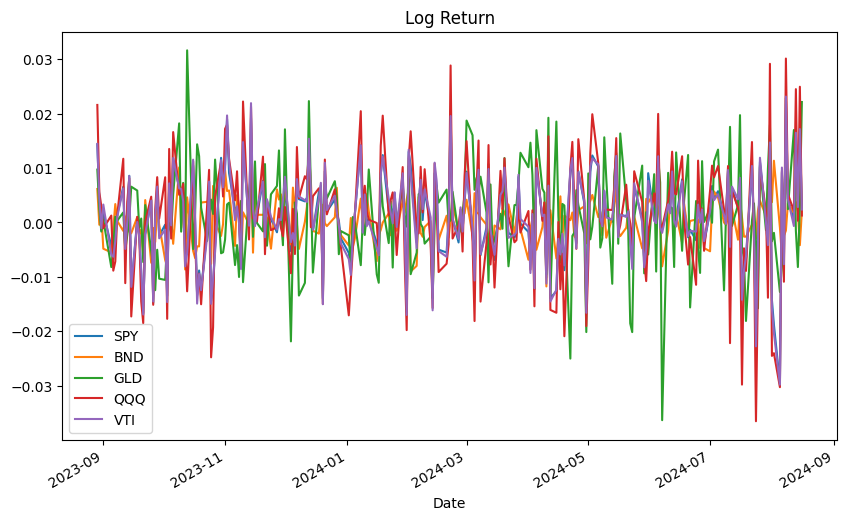

In [13]:
log_returns.plot(title="Log Return", figsize=(10,6))

In [14]:
cumulative_log_returns = log_returns.cumsum()
print(cumulative_log_returns.head())

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-29  0.014351  0.006159  0.009721  0.021605  0.014441
2023-08-30  0.018462  0.005740  0.012219  0.027166  0.018867
2023-08-31  0.016997  0.007414  0.010554  0.030160  0.017796
2023-09-01  0.018861  0.002595  0.011054  0.029101  0.021095
2023-09-05  0.014529 -0.002897  0.002859  0.030372  0.015113


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

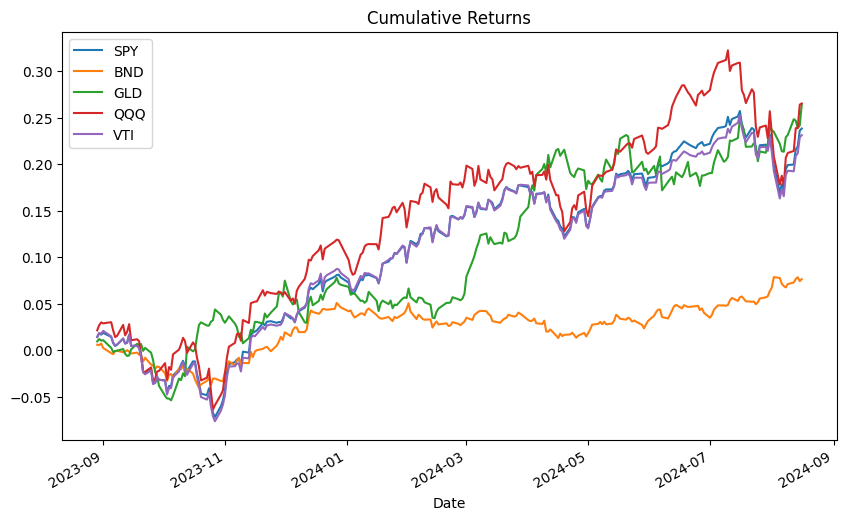

In [15]:
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))

In [17]:
log_returns.iloc[0]

SPY    0.014351
BND    0.006159
GLD    0.009721
QQQ    0.021605
VTI    0.014441
Name: 2023-08-29 00:00:00, dtype: float64

In [18]:
normalized_log_return = log_returns / log_returns.iloc[0]
print(normalized_log_return)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-29  1.000000  1.000000  1.000000  1.000000  1.000000
2023-08-30  0.286408 -0.067992  0.257055  0.257409  0.306476
2023-08-31 -0.102041  0.271797 -0.171296  0.138575 -0.074169
2023-09-01  0.129846 -0.782510  0.051416 -0.049006  0.228437
2023-09-05 -0.301809 -0.891679 -0.843065  0.058807 -0.414217
...              ...       ...       ...       ...       ...
2024-08-12  0.036600  0.285577  1.748780  0.099574 -0.044791
2024-08-13  1.136618  0.613364 -0.157760  1.134464  1.142207
2024-08-14  0.219481  0.305815 -0.842449  0.015009  0.196738
2024-08-15  1.184220 -0.677952  0.322398  1.154800  1.189146
2024-08-16  0.156050  0.350267  2.277699  0.059474  0.164971

[244 rows x 5 columns]


<AxesSubplot:title={'center':'Normalized Returns'}, xlabel='Date'>

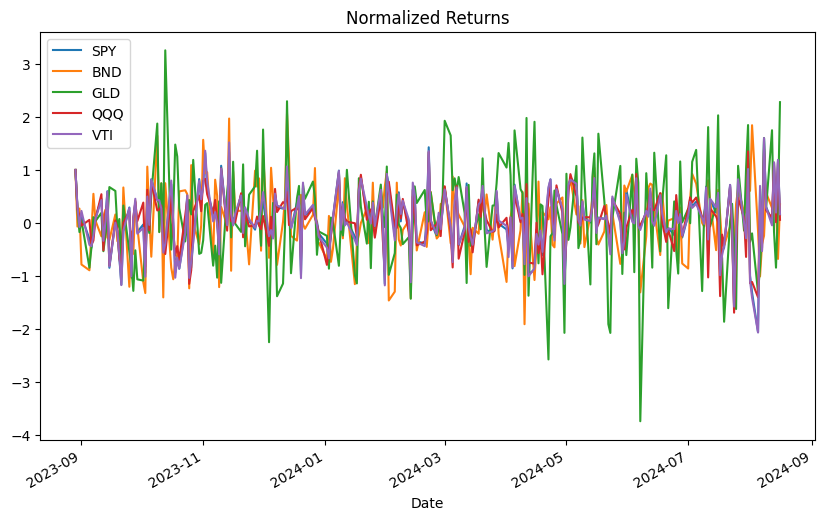

In [22]:
normalized_log_return.plot(title="Normalized Returns", figsize=(10, 6))

### Worst case scenario

Z-Score calculation 2 Std 

In [25]:
worst_case_scanario_df = log_returns.copy()

In [26]:
def z_score(x):
    return (x - x.mean()) / x.std()

In [27]:
worst_case_scanario_df.describe()

,SPY,BND,GLD,QQQ,VTI
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.000978,0.000314,0.001083,0.001088,0.000949
std,0.007840,0.004058,0.009068,0.010919,0.008080
min,-0.029556,-0.011755,-0.036336,-0.036529,-0.029805
25%,-0.002943,-0.002394,-0.004178,-0.004567,-0.003009
50%,0.001100,0.000551,0.000965,0.001964,0.000914
75%,0.005902,0.003323,0.006612,0.008184,0.006205
max,0.022854,0.012690,0.031642,0.030132,0.023147


In [28]:
columns = list(worst_case_scanario_df.columns)

zscore_columns = [ col + '_zscore' for col in columns]

for col, col_zscore in zip(columns, zscore_columns):
    worst_case_scanario_df[col_zscore] = (worst_case_scanario_df[col] - worst_case_scanario_df[col].mean()) / worst_case_scanario_df[col].std(ddof=0)

In [29]:
print(worst_case_scanario_df[zscore_columns].head())

            SPY_zscore  BND_zscore  GLD_zscore  QQQ_zscore  VTI_zscore
Date                                                                  
2023-08-29    1.709237    1.443292    0.954548    1.882870    1.673380
2023-08-30    0.400359   -0.181034    0.156481    0.410499    0.431244
2023-08-31   -0.312138    0.335756   -0.303650    0.174881   -0.250510
2023-09-01    0.113192   -1.267756   -0.064415   -0.197044    0.291472
2023-09-05   -0.678555   -1.433793   -1.025260    0.016721   -0.859552


In [43]:
query = ' | '.join([f'{c} <= {-2}' for c in zscore_columns])
query

'SPY_zscore <= -2 | BND_zscore <= -2 | GLD_zscore <= -2 | QQQ_zscore <= -2 | VTI_zscore <= -2'

In [44]:
worst_case_scanario = worst_case_scanario_df.query(query)
print(worst_case_scanario.head())

                 SPY       BND       GLD       QQQ       VTI  SPY_zscore  \
Date                                                                       
2023-09-21 -0.016666 -0.006250 -0.007275 -0.018494 -0.016914   -2.255091   
2023-09-26 -0.014800 -0.001001 -0.008023 -0.015130 -0.014510   -2.016578   
2023-10-03 -0.013477 -0.008136 -0.002892 -0.017705 -0.014626   -1.847388   
2023-10-12 -0.006115 -0.008642 -0.003054 -0.003481 -0.008070   -0.906539   
2023-10-25 -0.014456 -0.007589  0.004200 -0.024780 -0.014958   -1.972609   

            BND_zscore  GLD_zscore  QQQ_zscore  VTI_zscore  
Date                                                        
2023-09-21   -1.621077   -0.923555   -1.797175   -2.215426  
2023-09-26   -0.324914   -1.006243   -1.488423   -1.917284  
2023-10-03   -2.086797   -0.439275   -1.724763   -1.931605  
2023-10-12   -2.211728   -0.457165   -0.419357   -1.118554  
2023-10-25   -1.951675    0.344478   -2.374060   -1.972841  


In [ ]:
worst_case_scanario['BND_zscore']

### Plotting a single distribution

No handles with labels found to put in legend.


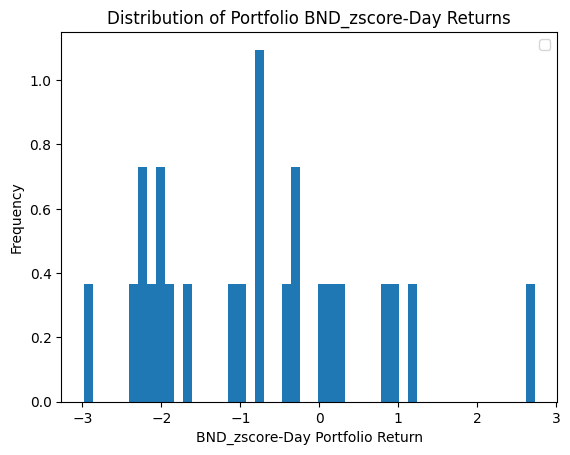

In [45]:
stock = 'BND_zscore'
plt.hist(worst_case_scanario[{stock}].dropna(), bins=50, density=True)
plt.xlabel(f'{stock}-Day Portfolio Return')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {stock}-Day Returns')
# plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [66]:
columns

['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


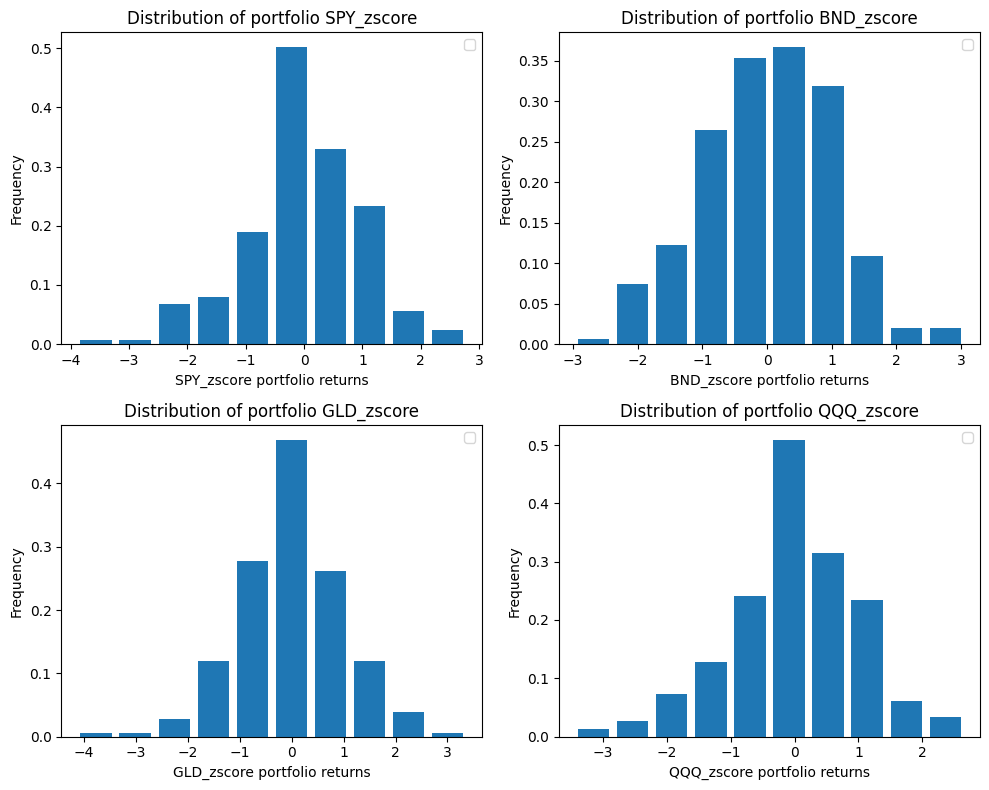

In [69]:
bins = 10

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

for stock, ax in zip(zscore_columns, axes.flatten()):

    ax.hist(worst_case_scanario_df[{stock}].dropna(), bins=bins, density=True, histtype='bar', rwidth=0.8)
    ax.set_xlabel(f'{stock} portfolio returns')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of portfolio {stock}')
    # plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
    ax.legend()

fig.tight_layout()
plt.show()